## Import

In [1]:
import numpy as np
import pandas as pd
import warnings ; warnings.filterwarnings('ignore')

# model
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cross_decomposition import PLSRegression

import matplotlib.pylab as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings ; warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

## Read Data

In [2]:
feature = pd.read_parquet('../data/feature_price_0918.pqt')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(feature.iloc[:,:-1], feature.iloc[:,-1], test_size=0.2, random_state=2023)
print(f'Train: {X_train.shape[0]}, Test: {X_test.shape[0]}')

Train: 368, Test: 93


In [4]:
num = ['n_grade','running_time', 'intermission', '선예매기간', 'date_gap', 'G1', 'G2', 'G3', 'G4', 'G5', 'play_st_time']

scaler = StandardScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

## Modeling

In [5]:
model = PLSRegression(n_components=5)
model.fit(X_train, y_train)

PLSRegression(n_components=5)

In [7]:
# test데이터의 71%를 설명한다.
model.score(X_test, y_test)

0.7103917666283939

In [44]:
# RMSE: 55149.876577811025
print(f'RMSE: {np.sqrt(mean_squared_error(model.predict(X_test), y_test))}')

RMSE: 55279.449934466


In [45]:
fimportance = pd.Series(model.coef_.flatten(), index=model.feature_names_in_, name='FImportance')
fimportance.abs().sort_values().head()

<AxesSubplot:>

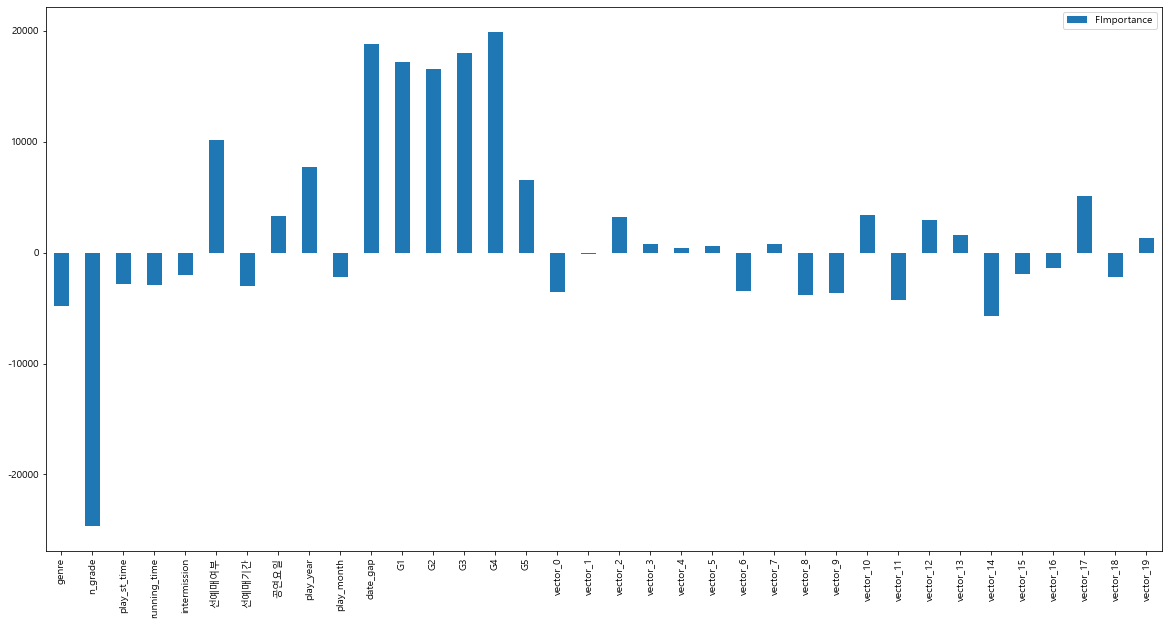

In [47]:
pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=['FImportance']).plot.bar(figsize=(20,10))